In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
df_train=pd.read_csv('/home/aditya123/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [5]:
print(df_train.shape)

(1460, 81)


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

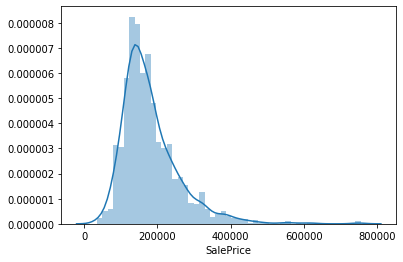

In [8]:
sns.distplot(df_train['SalePrice'])

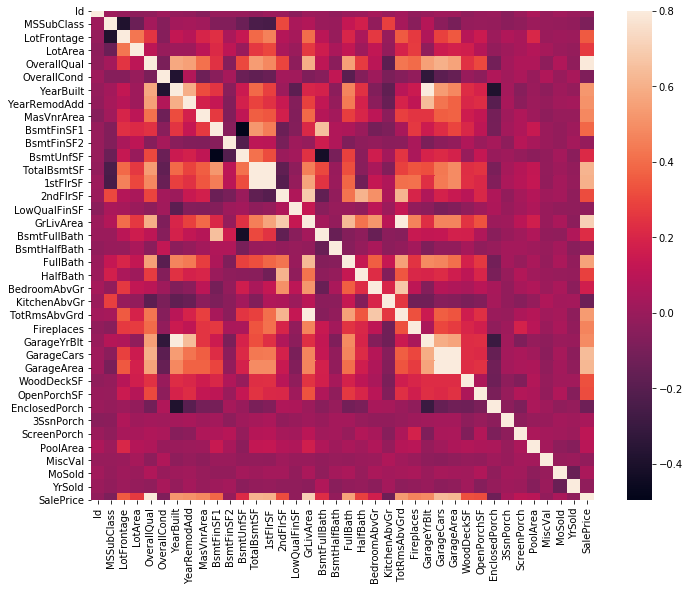

In [9]:
cormat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=0.8,square=True)

In [10]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum() > 1]

for feature in features_with_na:
    print(feature,np.round(df_train[feature].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


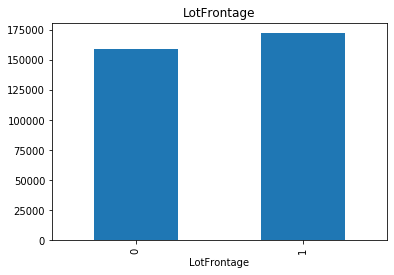

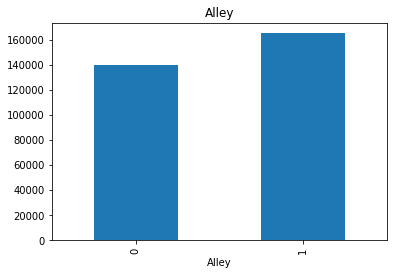

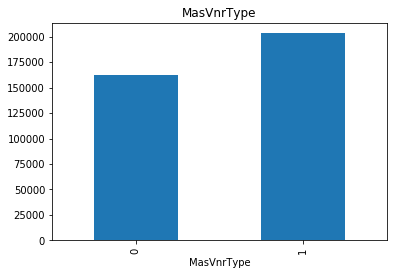

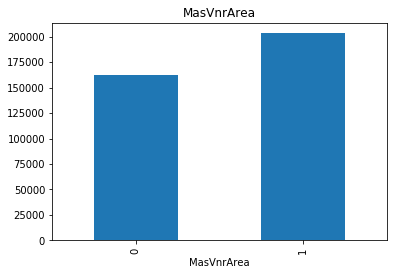

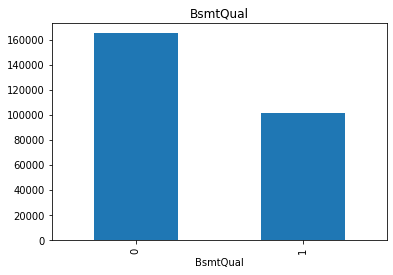

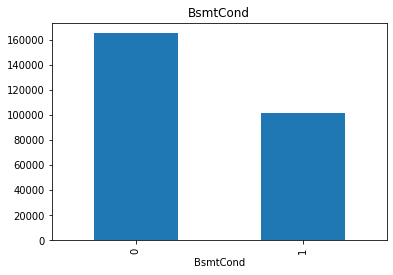

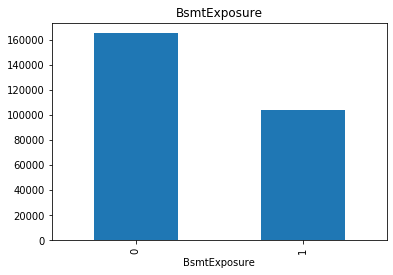

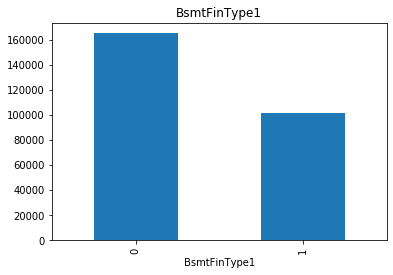

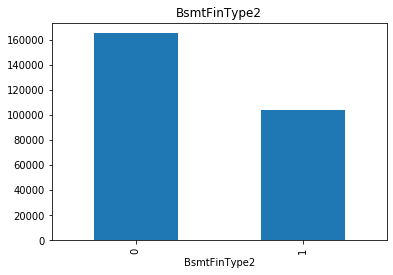

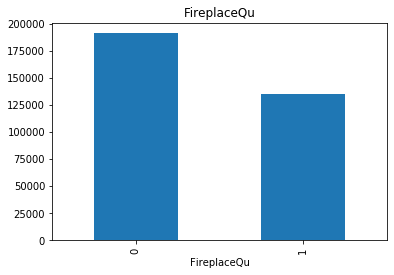

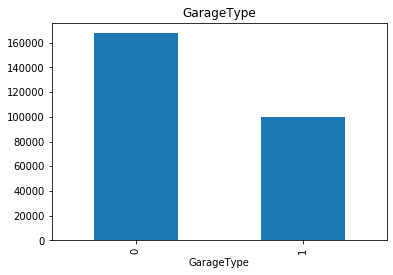

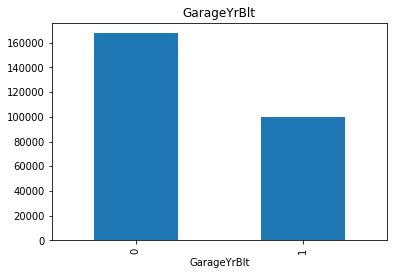

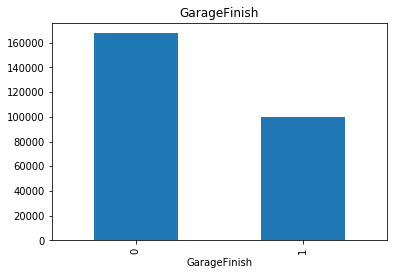

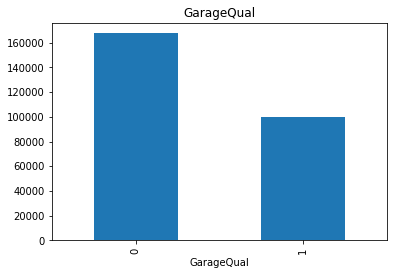

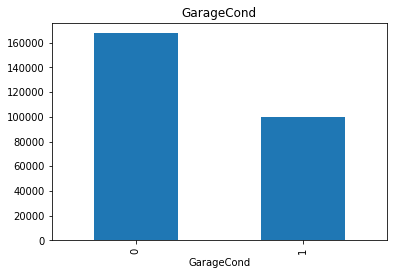

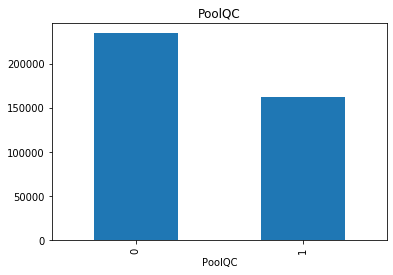

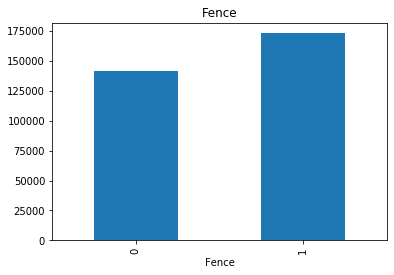

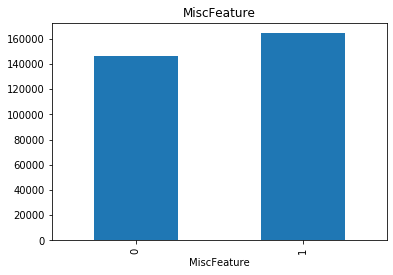

In [11]:
for feature in features_with_na:
    data = df_train.copy()
    
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [12]:
numerical_features=[features for features in df_train.columns if df_train[features].dtypes!='O']
print(len(numerical_features))


38


In [13]:
df_train[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
for feature in year_feature:
    print(feature,df_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

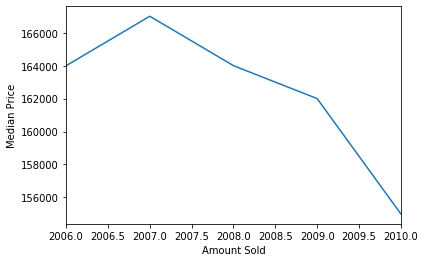

In [16]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Amount Sold')
plt.ylabel('Median Price')
plt.show()

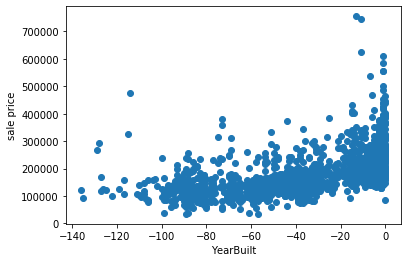

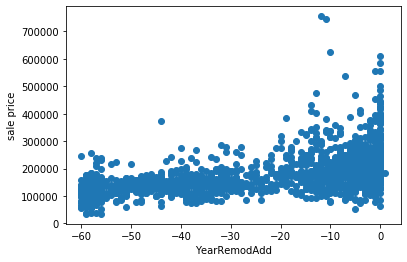

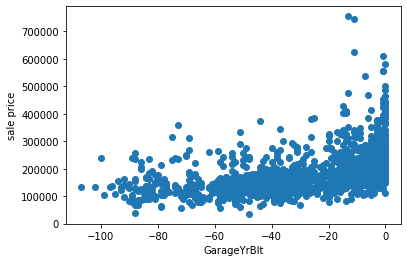

In [17]:
for feature in year_feature:
    if feature!='YrSold':
        dat=df_train.copy()
        dat[feature]=dat[feature]-dat['YrSold']
        plt.scatter(dat[feature],dat['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('sale price')
        plt.show()
        

In [18]:
discrete_feature = [features for features in numerical_features if len(df_train[features].unique()) < 25 and  features not in year_feature+['id']]
print("Discrete values {}".format(len(discrete_feature)))

Discrete values 17


In [48]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

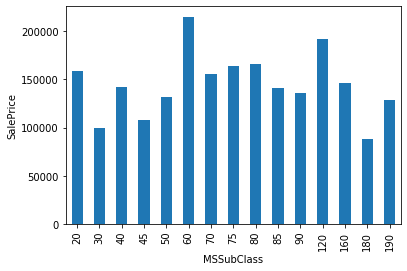

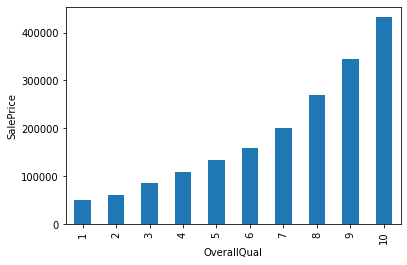

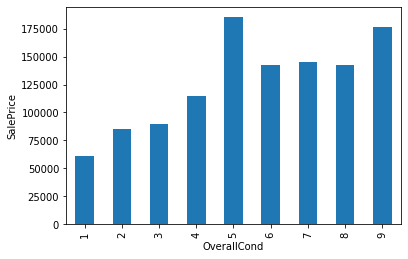

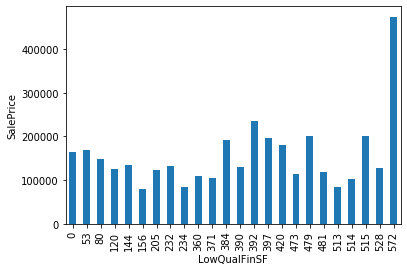

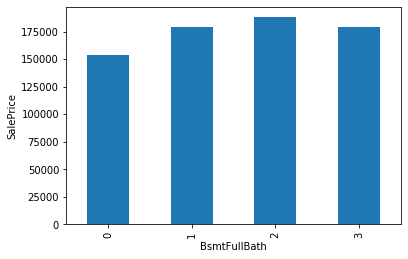

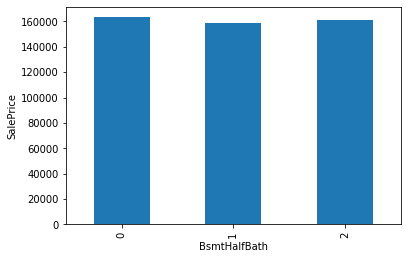

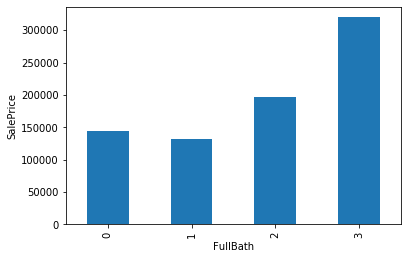

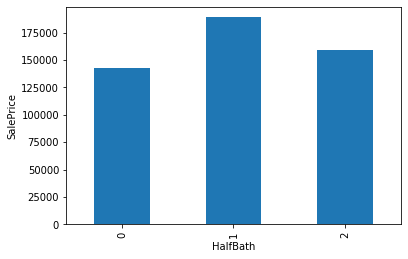

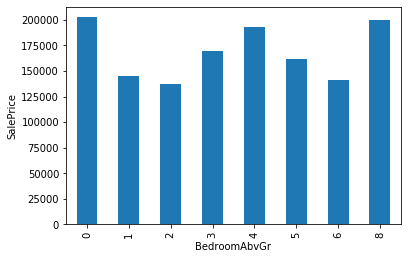

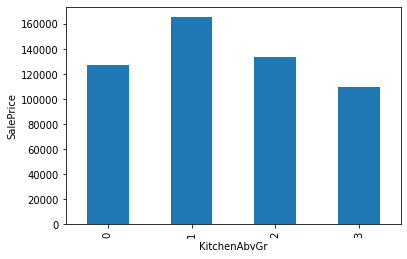

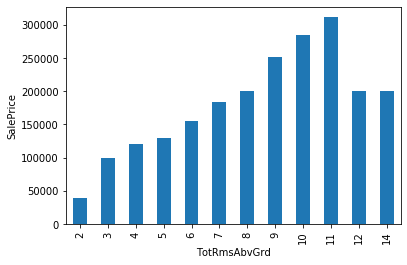

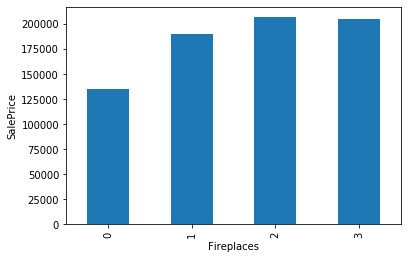

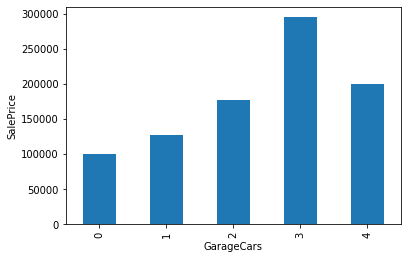

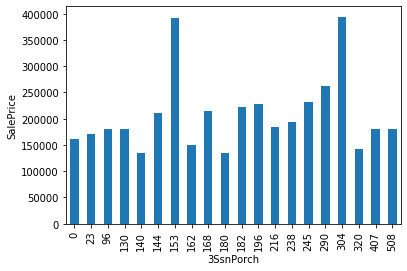

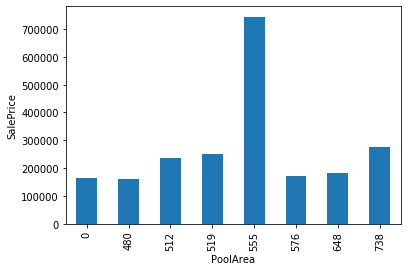

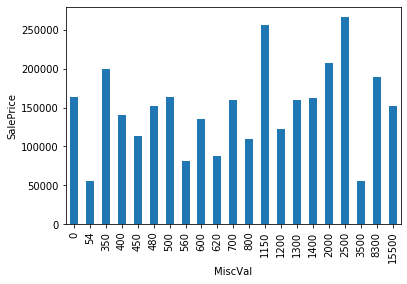

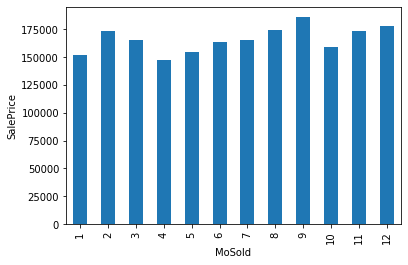

In [19]:
for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    

In [26]:
continuous_feature=[features for features in numerical_features if features not in discrete_feature+year_feature+['Id']]

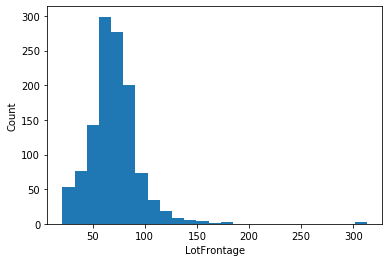

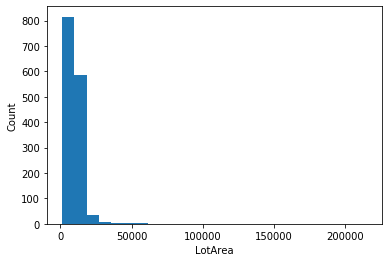

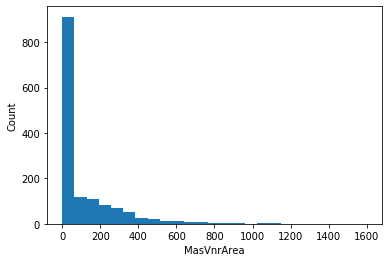

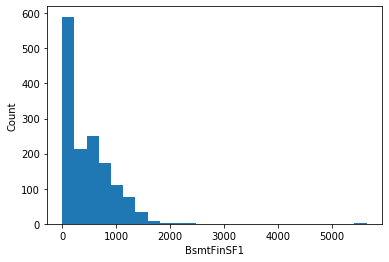

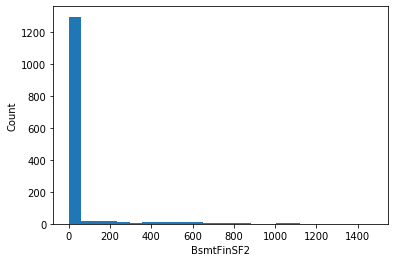

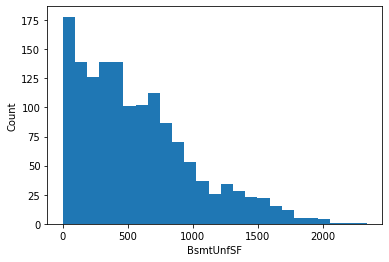

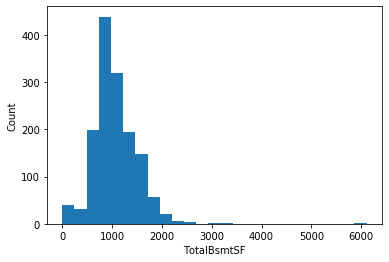

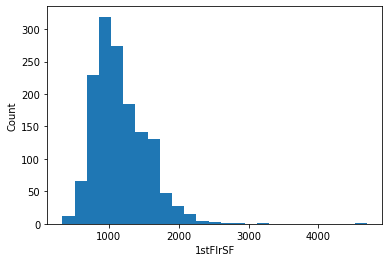

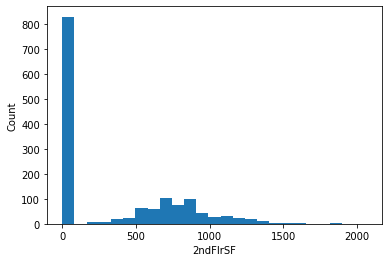

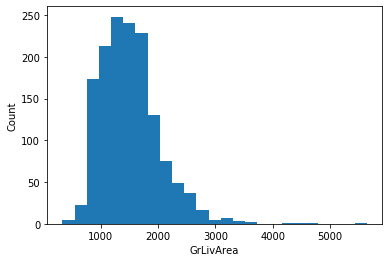

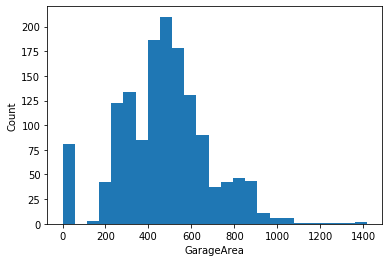

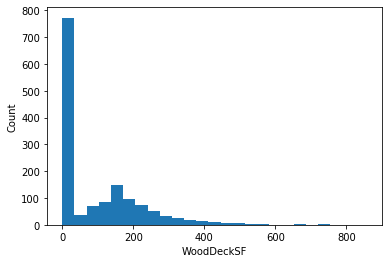

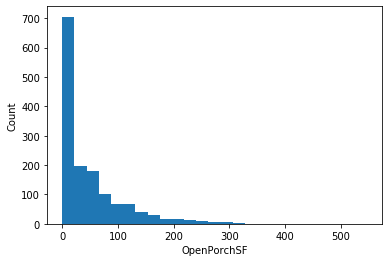

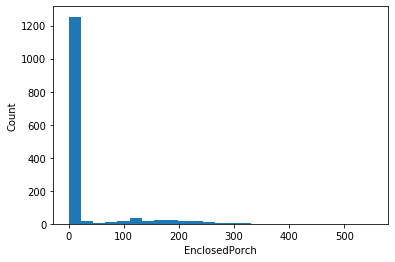

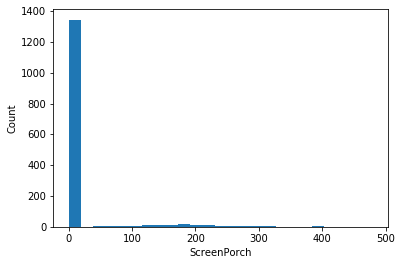

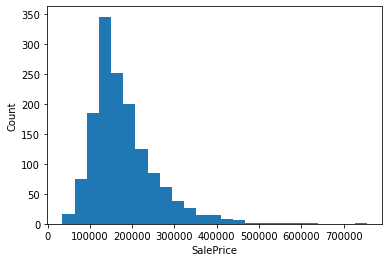

In [28]:
for feature in continuous_feature:
    data=df_train.copy()
    plt.hist(data[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    

In [32]:
categorical_variables=[features for features in df_train.columns if df_train[features].dtypes=='O']

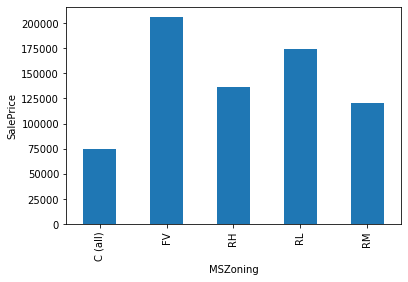

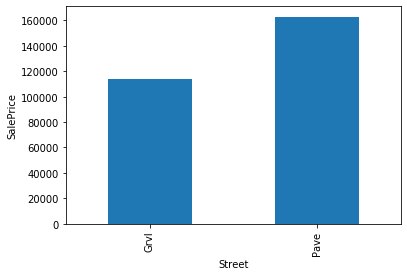

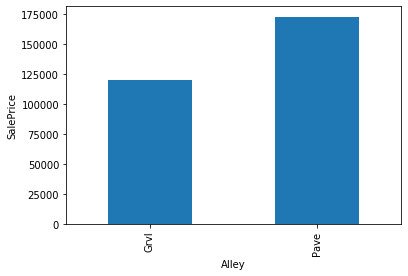

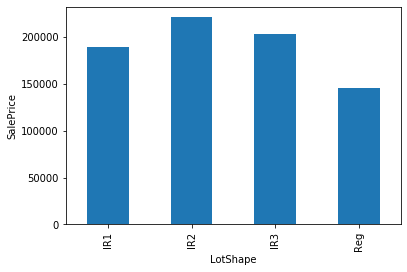

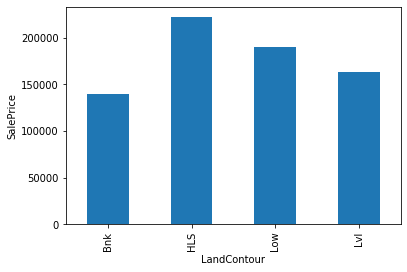

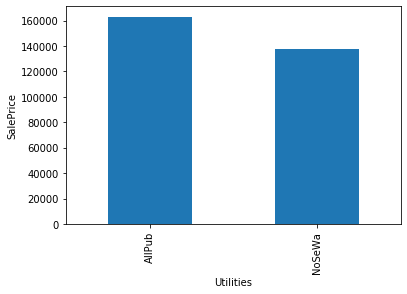

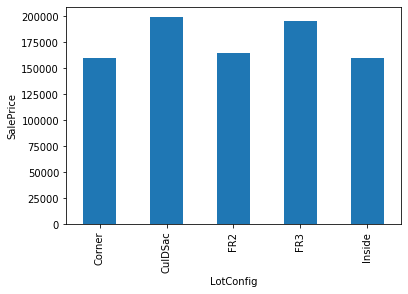

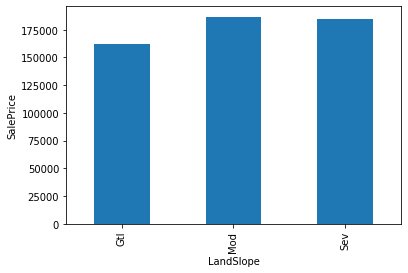

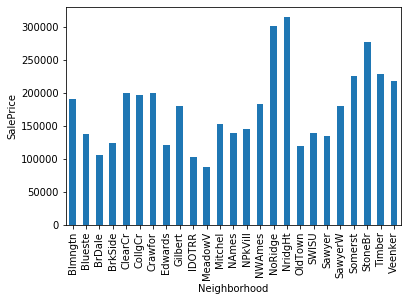

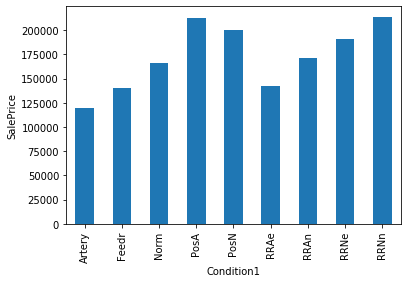

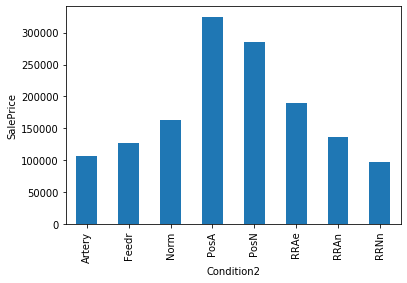

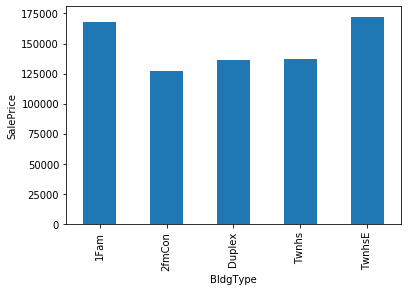

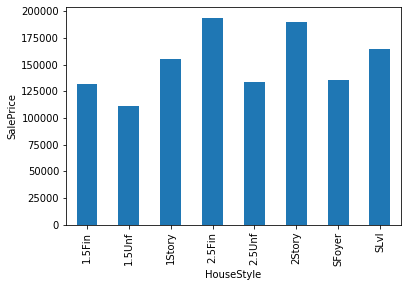

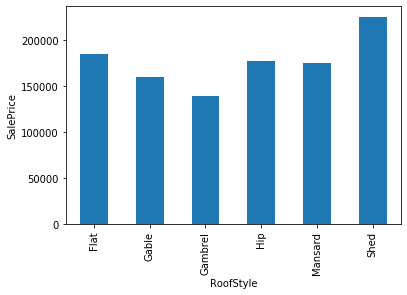

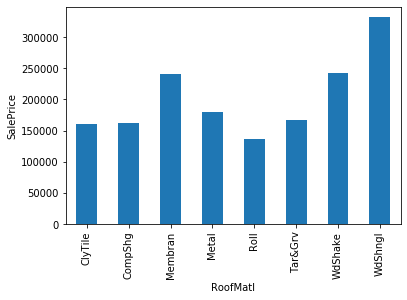

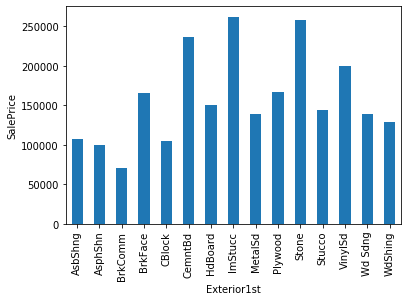

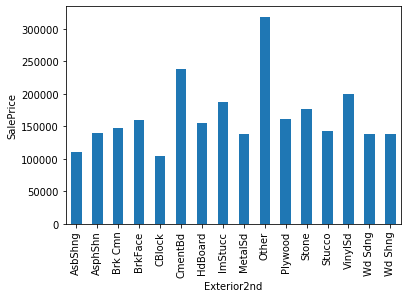

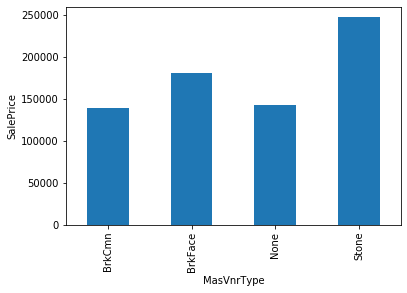

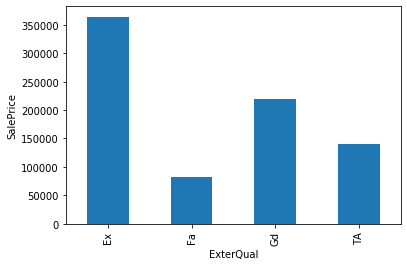

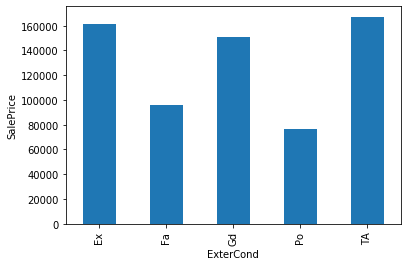

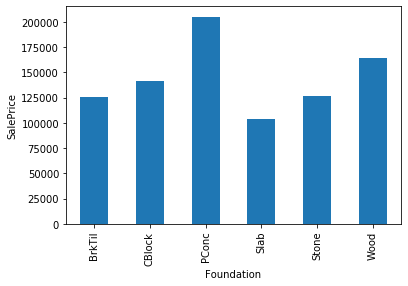

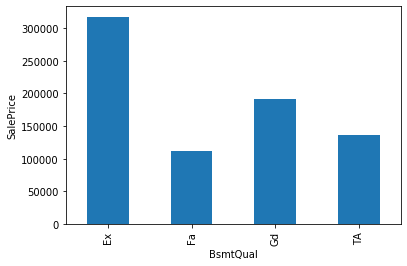

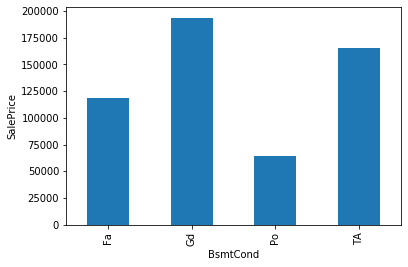

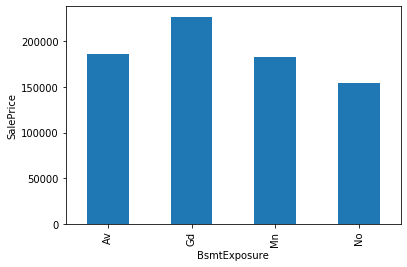

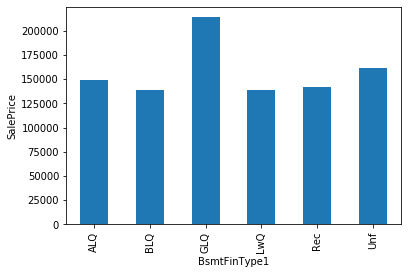

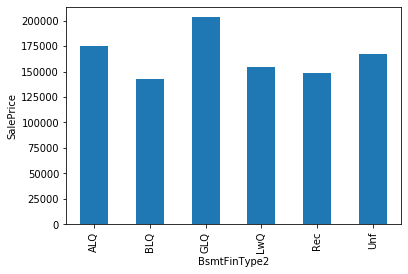

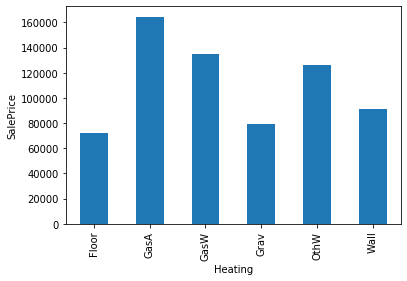

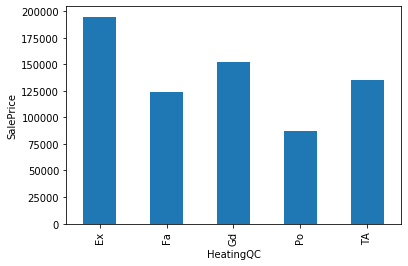

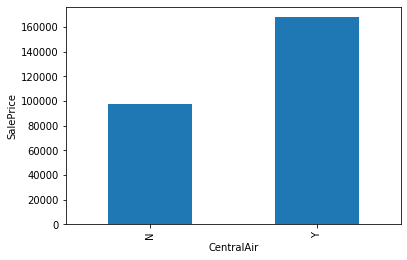

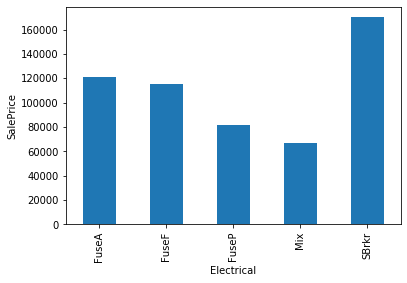

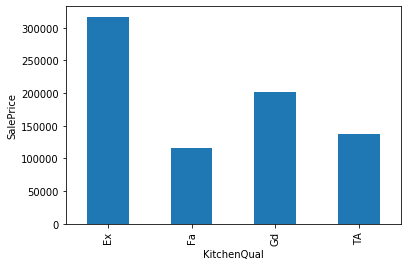

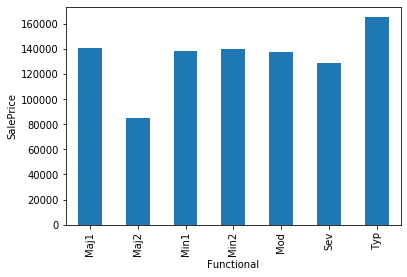

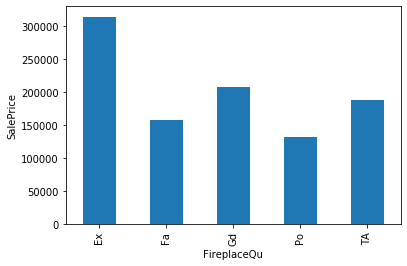

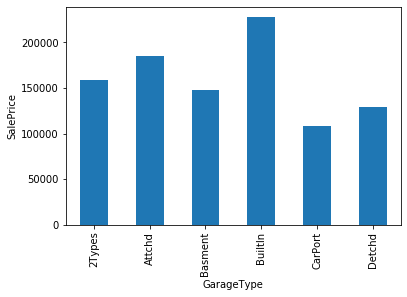

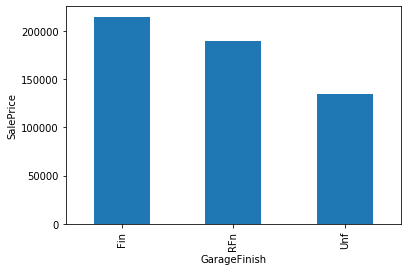

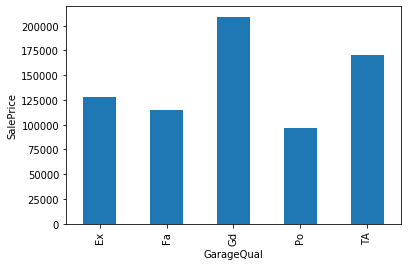

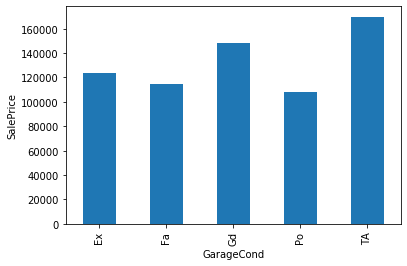

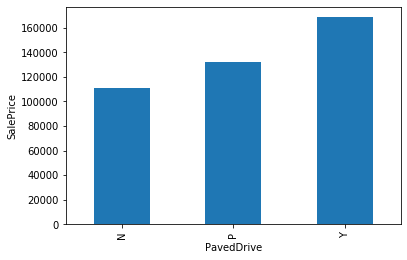

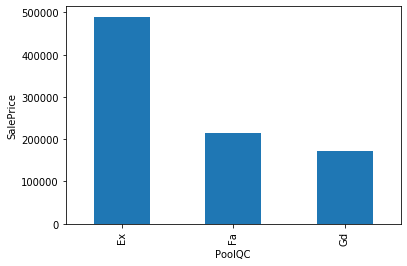

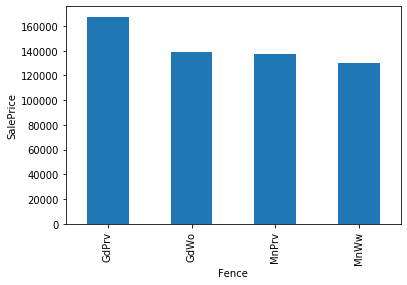

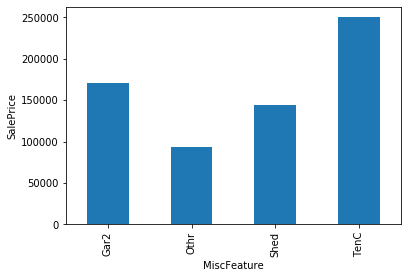

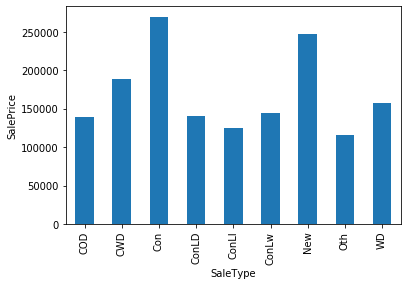

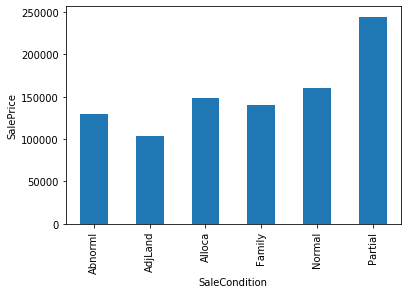

In [34]:
for feature in categorical_variables:
    df_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    

In [35]:
import seaborn as sns

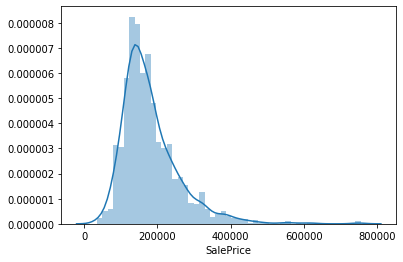

In [36]:
sns.distplot(df_train['SalePrice'])

In [37]:
print(df_train['SalePrice'].skew())
print(df_train['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


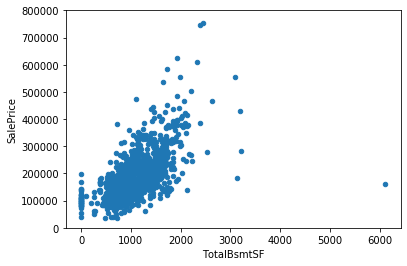

In [39]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

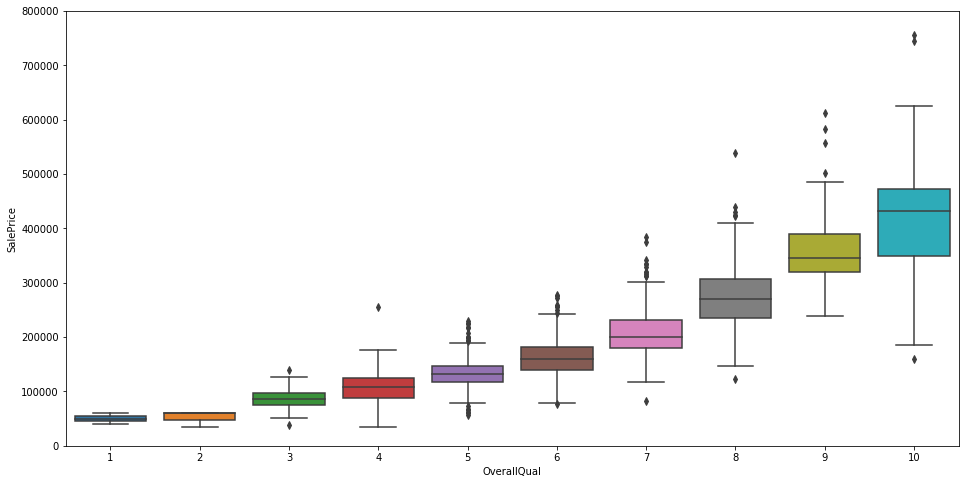

In [40]:
var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

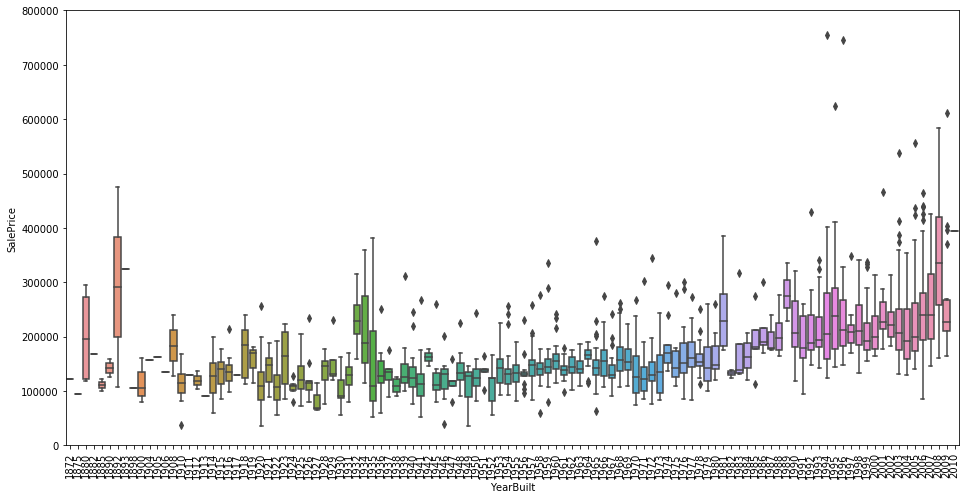

In [42]:
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA8UAAAHkCAYAAAAXXY3WAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdf5RcZ33n+fe3pbaRbYjsLtnYaifm0CIM4TCJ0Rrnh83E0G01k4lZkhBnd0MtcbA3IRKzyp4JZDmxBGQOmZPA0J2Mx15suGaycRxwjpUcFe6OA8HMWWNkGxqww6hDmriNZataki1bQiqpn/2jbotu0Wq11FV9q6ver3Pq9H2euvc+3y5s4Y+ep54bKSUkSZIkSepEXUUXIEmSJElSUQzFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHctQLEmSJEnqWE0NxRHxf0bEtyLimxHxFxHxsoh4VUR8JSLGI+IvI+Kc/Nxz8/Z4/v4Vs+7zgbz/2xFx/az+TXnfeES8f1b/vGNIkiRJkjRb00JxRKwHtgAbU0qvB1YBNwJ/BHw8pdQH7Aduyi+5Cdif9388P4+IeF1+3U8Am4D/EhGrImIV8GfAIPA64Nfyc1lgDEmSJEmSTmj28unVwJqIWA2cBzwDXAd8Nn8/A96eH9+Qt8nff0tERN5/T0rpSErpn4Fx4Kr8NZ5S+k5K6ShwD3BDfs2pxpAkSZIk6YSmheKU0tPAHwP/Qj0MPw88ChxIKR3LT5sE1ufH64Gn8muP5ef3zO4/6ZpT9fcsMIYkSZIkSSesbtaNI+JC6rO8rwIOAH9Ffflzy4iIm4GbAc4///w3vva1ry24IkmSJElSMzz66KPVlNK6k/ubFoqBtwL/nFLaCxAR9wE/C6yNiNX5TG4v8HR+/tPA5cBkvtz6R4CpWf0zZl8zX//UAmPMkVK6A7gDYOPGjWnXrl1L+40lSZIkSS0pIr47X38zv1P8L8DVEXFe/j3ftwBPAF8Afjk/pwzcnx/vyNvk7/99Sinl/Tfmu1O/CtgAPAJ8FdiQ7zR9DvXNuHbk15xqDEmSJEmSTmjmd4q/Qn2zq8eAb+Rj3QH8HrA1Isapf//3zvySO4GevH8r8P78Pt8C7qUeqD8PvDeldDyfBf4d4AHgSeDe/FwWGEOSJEmSpBOiPrEql09LkiRJUvuKiEdTShtP7m/2I5kkSZIkSWpZhmJJkiRJUscyFEuSJEmSOpahWJIkSZLUsQzFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHctQLEmSJEnqWIZiSZIkSVLHMhRLkiRJkjqWoViSJEmS1LEMxZIkSZKkjmUoliRJkiR1LEOxJEmSJKljGYolSZIkSYtWrVbZvHkzU1NTRZfSEIZiSZIkSdKiZVnG2NgYWZYVXUpDGIolSZIkSYtSrVapVCqklKhUKm0xW2woliRJkiQtSpZlpJQAmJ6ebovZYkOxJEmSJGlRRkdHqdVqANRqNUZGRgquaOkMxZIkSZKkRenv76e7uxuA7u5uBgYGCq5o6QzFkiRJkqRFKZfLJ44jYk57pTIUS5IkSZIWpVQqsX79egAuu+wyenp6Cq5o6QzFkiRJkqRFqVarfO973wPge9/7nrtPS5IkSZI6x+zdp1NK7j4tSZIkSeoc7j4tSZIkSepY7j4tSZIkSepY5XKZiACgq6vL3aclSZIkSZ2jVCoxODhIRDA4ONgWu0+vLroASZIkSdLKUS6XmZiYaItZYjAUS5IkSZLOQKlUYnh4uOgyGsbl05IkSZKkjmUoliRJkiR1LEOxJEmSJKljGYolSZIkSR3LUCxJkiRJ6liGYkmSJElSxzIUS5IkSZI6lqFYkiRJktSxDMWSJEmSpI5lKJYkSZIkdSxDsSRJkiSpYxmKJUmSJEkdy1AsSZIkSepYhmJJkiRJUscyFEuSJEmSOlbTQnFE/HhEfG3W64WI+PcRcVFEjEbE7vznhfn5ERFDETEeEWMRceWse5Xz83dHRHlW/xsj4hv5NUMREXn/vGNIkiRJkjRb00JxSunbKaWfTCn9JPBG4BDw18D7gQdTShuAB/M2wCCwIX/dDNwG9YAL3Aq8CbgKuHVWyL0NeM+s6zbl/acaQ5IkSZKkE5Zr+fRbgH9KKX0XuAHI8v4MeHt+fANwd6p7GFgbEZcC1wOjKaV9KaX9wCiwKX/vFSmlh1NKCbj7pHvNN4YkSZIkSScsVyi+EfiL/PiSlNIz+fEe4JL8eD3w1KxrJvO+hfon5+lfaIw5IuLmiNgVEbv27t17xr+UJEmSJGlla3oojohzgF8E/urk9/IZ3tTM8RcaI6V0R0ppY0pp47p165pZhiRJkiSpBS3HTPEg8FhK6dm8/Wy+9Jn853N5/9PA5bOu6837Furvnad/oTEkSZIkSTphOULxr/GDpdMAO4CZHaTLwP2z+t+V70J9NfB8vgT6AWAgIi7MN9gaAB7I33shIq7Od51+10n3mm8MSZIkSZJOWN3Mm0fE+UA/cMus7o8C90bETcB3gXfm/TuBtwHj1HeqfjdASmlfRHwY+Gp+3odSSvvy498GPg2sASr5a6ExJEmSJEk6IepfudXGjRvTrl27ii5DkiRJktQEEfFoSmnjyf3Ltfu0JEmSJEktx1AsSZIkSepYhmJJkiRJUscyFEuSJEmSOpahWJIkSZLUsQzFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHctQLEmSJEnqWIZiSZIkSVLHMhRLkiRJkjqWoViSJEmS1LEMxZIkSZKkjmUoliRJkiR1LEOxJEmSJKljGYolSZIkSR3LUCxJkiRJ6liGYkmSJElSxzIUS5IkSZI6lqFYkiRJktSxDMWSJEmSpI5lKJYkSZIkdSxDsSRJkiSpYxmKJUmSJEkdy1AsSZIkSepYhmJJkiRJUscyFEuSJEmSOpahWJIkSZLUsQzFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHctQLEmSJEnqWKuLLkCSJEmS1HxDQ0OMj48v+T6Tk5MA9Pb2LvlefX19bNmyZcn3WQpDsSRJkiRp0Q4fPlx0CQ1lKJYkSZKkDtCoGdmZ+wwNDTXkfkXzO8WSJEmSpI5lKJYkSZLUNqrVKps3b2ZqaqroUrRCGIolSZIktY0syxgbGyPLsqJL0QphKJYkSZLUFqrVKpVKhZQSlUrF2WItiqFYkiRJUlvIsoyUEgDT09POFmtRDMWSJEmS2sLo6Ci1Wg2AWq3GyMhIwRVpJTAUS5IkSWoL/f39dHd3A9Dd3c3AwEDBFWklMBRLkiRJagvlcpmIAKCrq4tyuVxwRVoJmhqKI2JtRHw2Iv4xIp6MiJ+OiIsiYjQiduc/L8zPjYgYiojxiBiLiCtn3aecn787Isqz+t8YEd/IrxmK/N+AU40hSZIkqX2VSiUGBweJCAYHB+np6Sm6JK0AzZ4p/gTw+ZTSa4F/DTwJvB94MKW0AXgwbwMMAhvy183AbVAPuMCtwJuAq4BbZ4Xc24D3zLpuU95/qjEkSZIktbFyucwb3vAGZ4m1aE0LxRHxI8C1wJ0AKaWjKaUDwA3AzDZwGfD2/PgG4O5U9zCwNiIuBa4HRlNK+1JK+4FRYFP+3itSSg+n+hZzd590r/nGkCRJktTGSqUSw8PDzhJr0Zo5U/wqYC/wqYh4PCI+GRHnA5eklJ7Jz9kDXJIfrweemnX9ZN63UP/kPP0sMIYkSZIkSSc0MxSvBq4Ebksp/RTwEictY85neFMTa1hwjIi4OSJ2RcSuvXv3NrMMSZIkSVILamYongQmU0pfydufpR6Sn82XPpP/fC5//2ng8lnX9+Z9C/X3ztPPAmPMkVK6I6W0MaW0cd26dWf1S0qSJEmSVq6mheKU0h7gqYj48bzrLcATwA5g5lvvZeD+/HgH8K58F+qrgefzJdAPAAMRcWG+wdYA8ED+3gsRcXW+6/S7TrrXfGNIkiRJknTC6ibffzPw5xFxDvAd4N3Ug/i9EXET8F3gnfm5O4G3AePAofxcUkr7IuLDwFfz8z6UUtqXH/828GlgDVDJXwAfPcUYkiRJkiSd0NRQnFL6GrBxnrfeMs+5CXjvKe5zF3DXPP27gNfP0z813xiSJEmSJM3W7OcUS5IkSdKyqVarbN68mampqaJL0QphKJYkSZLUNrIsY2xsjCzLii5FK4ShWJIkSVJbqFarVCoVUkpUKhVni7UohmJJkiRJbSHLMupbFcH09LSzxVoUQ7EkSZKktjA6OkqtVgOgVqsxMjJScEVaCQzFkiRJktpCf38/3d3dAHR3dzMwMFBwRVoJDMWSJEmS2kK5XCYiAOjq6qJcLhdckVYCQ7EkSZKktlAqlRgcHCQiGBwcpKenp+iStAKsLroASZIkSWqUcrnMxMSEs8RaNEOxJEmSpLZRKpUYHh4uugytIC6fliRJkiR1LEOxJEmSJKljGYolSZIkSR3LUCxJkiRJ6liGYkmSJElto1qtsnnzZqampoouRSuEoViSJElS28iyjLGxMbIsK7oUrRCGYkmSJEltoVqtUqlUSClRqVScLdaiGIolSZIktYUsy0gpATA9Pe1ssRbFUCxJkiSpLYyOjlKr1QCo1WqMjIwUXJFWAkOxJEmSpLbQ399Pd3c3AN3d3QwMDBRckVYCQ7EkSZKktlAul4kIALq6uiiXywVXpJXAUCxJkiSpLZRKJQYHB4kIBgcH6enpKbokrQCriy5AkiRJkhqlXC4zMTHhLLEWzVAsSZIkqW2USiWGh4eLLkMriMunJUmSpGVQrVbZvHmzz86VWoyhWJIkSVoGWZYxNjbms3OlFmMoliRJkpqsWq1SqVRIKVGpVJwtllqIoViSJElqsizLSCkBMD097Wyx1EIMxZIkSVKTjY6OUqvVAKjVaoyMjBRckaQZhmJJkiSpyfr7++nu7gagu7ubgYGBgiuSNMNQLEmSJDVZuVwmIgDo6uryGbpSCzEUS5IkSU1WKpUYHBwkIhgcHKSnp6fokiTlVhddgCRJktQJyuUyExMTzhJLLcZQLEmSJC2DUqnE8PBw0WVIOonLpyVJkiRJHctQLEmSJEnqWIZiSZIkSVLHMhRLkiRJkjqWoViSJEmS1LEMxZIkSZKkjmUoliRJkiR1LEOxJEmSJKljGYolSZIkSR3LUCxJkiRJ6liGYkmSJElto1qtsnnzZqampoouRStEU0NxRExExDci4msRsSvvuygiRiNid/7zwrw/ImIoIsYjYiwirpx1n3J+/u6IKM/qf2N+//H82lhoDEmSJEntLcsyxsbGyLKs6FK0QizHTPHPp5R+MqW0MW+/H3gwpbQBeDBvAwwCG/LXzcBtUA+4wK3Am4CrgFtnhdzbgPfMum7TacaQJEmS1Kaq1SqVSoWUEpVKxdliLUoRy6dvAGb+2iYD3j6r/+5U9zCwNiIuBa4HRlNK+1JK+4FRYFP+3itSSg+nlBJw90n3mm8MSZIkSW0qyzLq0QCmp6edLdaiNDsUJ2AkIh6NiJvzvktSSs/kx3uAS/Lj9cBTs66dzPsW6p+cp3+hMSRJkiS1qdHRUWq1GgC1Wo2RkZGCK9JK0OxQ/HMppSupL41+b0RcO/vNfIY3NbOAhcaIiJsjYldE7Nq7d28zy5AkSZLUZP39/XR3dwPQ3d3NwMBAwRVpJWhqKE4pPZ3/fA74a+rfCX42X/pM/vO5/PSngctnXd6b9y3U3ztPPwuMcXJ9d6SUNqaUNq5bt+5sf01JkiRJLaBcLpPvvUtXVxflcvk0V0hNDMURcX5EvHzmGBgAvgnsAGb+6SwD9+fHO4B35btQXw08ny+BfgAYiIgL8w22BoAH8vdeiIir812n33XSveYbQ5IkSVKbKpVKDA4OEhEMDg7S09NTdElaAVY38d6XAH+d/03NauD/TSl9PiK+CtwbETcB3wXemZ+/E3gbMA4cAt4NkFLaFxEfBr6an/ehlNK+/Pi3gU8Da4BK/gL46CnGkCRJktTGyuUyExMTzhJr0ZoWilNK3wH+9Tz9U8Bb5ulPwHtPca+7gLvm6d8FvH6xY0iSJElqb6VSieHh4aLL0ApSxCOZJEmSJElqCYZiSZIkSVLHauZ3iiVJkiRpUYaGhhgfH1/yfSYnJwHo7e09zZmn19fXx5YtW5Z8H7U2Q7EkSZKktnH48OGiS9AKYyiWJEmSVLhGzcjO3GdoaKgh91P78zvFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHcuNtiRJkiSphTXqcVWNsnv3bqBxm6M1wlIen2UoliRJkqQWNj4+zuNPPMnxdZcUXQoAXfmC41179xVcSd2qvc8u6XpDsSRJkiS1uOPrLuGlX/r1ostoSed/7jNLut7vFEuSJEmSOpahWJIkSZLUsQzFkiRJkqSOZSiWJEmSJHUsQ7EkSZIkqWMZiiVJkiRJHctQLEmSJEnqWIZiSZIkSVLHMhRLkiRJkjqWoViSJEmS1LEMxZIkSZKkjmUoliRJkiR1LEOxJEmStAyq1SqbN29mamqq6FIkzWIoliRJkpZBlmWMjY2RZVnRpUiaxVAsSZIkNVm1WqVSqZBSolKpOFsstRBDsSRJktRkWZaRUgJgenra2WKphRiKJUmSpCYbHR2lVqsBUKvVGBkZKbgiSTMWHYoj4uci4t358bqIeFXzypIkSZLaR39/P6tXrwZg9erVDAwMFFyRpBmLCsURcSvwe8AH8q5u4L81qyhJkiSpnZTLZaanp4H68ulyuVxwRZJmrF7kef8z8FPAYwAppe9FxMubVpUkSZIkCYDJyUlWvXCQ8z/3maJLaUmr9j7L5JFDZ339YpdPH031nQESQEScf9YjSpIkSR0myzIiAoCIcKMtqYUsdqb43oi4HVgbEe8BfgP4f5pXliRJktQ+RkdHOX78OADHjx9nZGSErVu3FlyVVore3l727N3HS7/060WX0pLO/9xn6F130Vlfv6iZ4pTSHwOfBT4H/DjwByml4bMeVZIkSeog11xzzZz2tddeW1Alkk62qJnifKfph1JKo3l7TURckVKaaGZxkiRJUjs4cuTIgm1JxVnsd4r/Cpie1T6e90mSJEk6jS9/+ctz2g899FBBlUg62WJD8eqU0tGZRn58TnNKkiRJktpLfc/aU7clFWexoXhvRPziTCMibgCqzSlJkiRJai9vfetb57T7+/sLqkTSyRYbiv8P4Pcj4l8i4ing94BbmleWJEmS1D5uueUWurrq/+nd1dXFLbf4n9JSq1js7tP/lFK6Gngd8K9SSj+TUhpvbmmSJElSeyiVSidmhwcGBujp6Sm4IkkzFtx9OiL+t5TSf4uIrSf1A5BS+lgTa5MkSZLaxi233MKePXucJZZazOkeyXR+/vPlzS5EkiRJamelUonh4eGiy5B0kgVDcUrp9ohYBbyQUvr4MtUkSZIktZShoSHGx5f27cHJyUkAent7l1xPX18fW7ZsWfJ9JC3iO8UppePAry1DLZIkSVLbOnz4MIcPHy66DEknOd3y6Rn/PSL+FPhL4KWZzpTSY02pSpIkSWohjZiVnbnH0NDQku8lqXEW+0imnwR+AvgQ8Cf5648Xc2FErIqIxyPib/P2qyLiKxExHhF/GRHn5P3n5u3x/P0rZt3jA3n/tyPi+ln9m/K+8Yh4/6z+eceQJEmSJGm2xT6S6efneV23yDHeBzw5q/1HwMdTSn3AfuCmvP8mYH/e//H8PCLidcCN1EP5JuC/5EF7FfBnwCD1R0X9Wn7uQmNIkiRJknTCgqE4It4UEV+PiBcj4v+LiH91JjePiF7g3wKfzNsBXAd8Nj8lA96eH9+Qt8nff0t+/g3APSmlIymlfwbGgavy13hK6TsppaPAPcANpxlDkiRJkqQTTjdT/GfA/wX0AB8D/vMZ3v8/A/8BmM7bPcCBlNKxvD0JrM+P1wNPAeTvP5+ff6L/pGtO1b/QGHNExM0RsSsidu3du/cMfzVJkiRJ0kp3ulDclVIazWdp/wpYt9gbR8QvAM+llB5dUoVNlFK6I6W0MaW0cd26Rf9qkiRJkqQ2cbrdp9dGxDtO1U4p3bfAtT8L/GJEvA14GfAK4BP5PVbnM7m9wNP5+U8DlwOTEbEa+BFgalb/jNnXzNc/tcAYkiRJkiSdcLqZ4n8A/t2s1+z2Lyx0YUrpAyml3pTSFdQ3yvr7lNL/CnwB+OX8tDJwf368I2+Tv//3KaWU99+Y7079KmAD8AjwVWBDvtP0OfkYO/JrTjWGJEmSJEknLDhTnFJ6dxPG/D3gnoj4CPA4cGfefyfwmYgYB/ZRD7mklL4VEfcCTwDHgPemlI4DRMTvAA8Aq4C7UkrfOs0YkiRJkiSdcLrl0wBExCXAfwQuSykN5o8++umU0qLCZkrpi8AX8+PvUN85+uRzvg/8yimu/0PgD+fp3wnsnKd/3jEkSZI0v2q1yvbt29m2bRs9PT1Fl6MVZGhoiPHx8aLLOGH37t0AbNmypeBK6vr6+lqmFs1vUaEY+DTwKeD/ztv/A/hLnIGVJElqC1mWMTY2RpZlbN26tehytIKMj4/zxBOPU1qXii4lFwA8t/exguuA6t4ougQtwmJDcSmldG9EfADqj0yKiONNrEuSJEnLpFqtUqlUSClRqVQol8vOFuuMlNYl3vGOo0WX0XLuu++cokvQIpxuo60ZL0VED5AAIuJq6s8RliRJ0gqXZRn1vUphenqaLMsKrkiSls9iQ/FW6rtAvzoi/jtwN7C5aVVJkiRp2YyOjlKr1QCo1WqMjIwUXJEkLZ9FheKU0mPAm4GfAW4BfiKlNNbMwiRJkrQ8+vv7Wb26/q261atXMzAwUHBFkrR8FvxOcUS84xRvvSYiSCnd14SaJEmStIzK5TJ/8zd/A9SXT5fL5YIrkqTlc7qNtv7dAu8lwFAsSZIkSVqxFgzFKaV3L1chkiRJKkaWZXR1dTE9PU1XV5ePZZLUURa70RYR8W8j4j9ExB/MvJpZmCRJkpbH6Ogox44dA+DYsWNutCWpoywqFEfEfwV+lfqO0wH8CvBjTaxLkiRJy6S/v5/u7m4Auru73WhLUkdZ7Ezxz6SU3gXsTyltB34aeE3zypIkSdJyKZfLRAQAXV1dbrQlqaMsNhQfzn8eiojLgGPApc0pSZIkScupVCoxODhIRDA4OEhPT0/RJUnSsjnd7tMz/jYi1gL/CXg07/tkc0qSJEnSciuXy0xMTDhLLKnjnO45xf8T8FRK6cN5+wLgG8A/Ah9vfnmSJElaDqVSieHh4aLLkKRld7rl07cDRwEi4lrgo3nf88AdzS1NkiRJkqTmOt3y6VUppX358a8Cd6SUPgd8LiK+1tzSJEmSJElqrtPNFK+KiJng/Bbg72e9t9jvI0uSJEmS1JJOF2z/AviHiKhS34H6IYCI6KO+hFqSJEmSpBVrwVCcUvrDiHiQ+uOXRlJKKX+rC9jc7OIkSZIkSWqm0y6BTik9PE/f/2hOOZIkSZIkLZ/TfadYkiRJkqS25WZZkiRJktTiVu19lvM/95miywCg68B+AKbXXlhwJXWr9j4L6y466+sNxZIkSaJarbJ9+3a2bdtGT09P0eVImqWvr6/oEubYfWAKgA1LCKINte6iJX1GhmJJkiSRZRljY2NkWcbWrVuLLkcryOTkJC+8ENx33zlFl9JyqnuDo0cml3yfLVu2NKCaxpmpZ2hoqOBKGsPvFEuSJHW4arVKpVIhpUSlUmFqaqrokiRp2ThTLEmS1OGyLGPmyZvT09POFuuM9Pb28tze53jHO44WXUrLue++c7h4XW/RZeg0nCmWJEnqcKOjo9RqNQBqtRojIyMFVyRJy8dQLEmS1OH6+/vntAcGBgqqRJKWn6FYkiSpw11zzTVz2m9+85sLqkSSlp+hWJIkqcP96Z/+6Zz2Jz7xiYIqkaTlZyiWJEnqcBMTEwu2JamdGYolSZI63OWXX75gW5LamaFYkiSpw7361a+e0+7r6yuoEklafoZiSZKkDvfII4/MaX/lK18pqBJJWn6GYkmSpA7X399PV1f9Pwu7urp8JJOkjmIoliRJ6nDlcpmUEgApJcrlcsEVSdLyMRRLkiR1uH379s0Jxfv37y+4IklaPquLLkCSJEnF+shHPjKn/aEPfYi77767oGq0ElX3Bvfdd07RZQDw/IEA4EfWpoIrqX8uF68rugqdjqFYkiSpw/mcYi1Fq+1W/vyB3QBcvG5DwZXAxeta7/PRDzMUS5IkdbgLLriAF198cU5bWqwtW7YUXcIcM/UMDQ0VXIlWCr9TLEmS1OGOHj06p12r1QqqRJKWn6FYkiSpw51zztzvgnZ3dxdUiSQtP0OxJElSh5u9dHq+tiS1M0OxJElSh7viiisWbEtSO3OjLUmSpA73wQ9+kN/8zd880f6DP/iDAqtprKGhIcbHx4suA4Ddu+u7IrfSxlR9fX0tVY9UhKaF4oh4GfAl4Nx8nM+mlG6NiFcB9wA9wKPAr6eUjkbEucDdwBuBKeBXU0oT+b0+ANwEHAe2pJQeyPs3AZ8AVgGfTCl9NO+fd4xm/a6SJEkr2Wte8xquuOIKJiYmuOKKK9rqETLj4+N885vfbIkdtWc2MGuVR165TF6qa+ZM8RHgupTSixHRDXw5IirAVuDjKaV7IuK/Ug+7t+U/96eU+iLiRuCPgF+NiNcBNwI/AVwG/F1EvCYf48+AfmAS+GpE7EgpPZFfO98YkiRJmscHP/hB3ve+97XVLPGMCy64gCuvvLLoMlrOY489VnQJUktoWihOKSVg5q+fuvNXAq4D/pe8PwO2UQ+sN+THAJ8F/jQiIu+/J6V0BPjniBgHrsrPG08pfQcgIu4BboiIJxcYQ5Ikqa00annw5OQka9asacizXV2SK2klaepGWxGxKiK+BjwHjAL/BBxIKR3LT5kE1ufH64GnAPL3n6e+/PlE/0nXnKq/Z4ExJEmSNI/Dhw9z+PDhosuQpGXX1I22UkrHgZ+MiLXAXwOvbeZ4ZyoibgZuBvjRH/3RgquRJEk6c42akZ25TyNmiiVpJVmWRzKllA4AXwB+GlgbETNhvBd4Oj9+GrgcIH//R6hvuHWi/5S9ecEAAB/ZSURBVKRrTtU/tcAYJ9d1R0ppY0pp47p165b0O0qSJEmSVp6mheKIWJfPEBMRa6hviPUk9XD8y/lpZeD+/HhH3iZ//+/z7yXvAG6MiHPzXaU3AI8AXwU2RMSrIuIc6ptx7civOdUYkiRJkiSd0Mzl05cCWUSsoh6+700p/W1EPAHcExEfAR4H7szPvxP4TL6R1j7qIZeU0rci4l7gCeAY8N58WTYR8TvAA9QfyXRXSulb+b1+7xRjSJIkSZJ0QjN3nx4Dfmqe/u/wg92jZ/d/H/iVU9zrD4E/nKd/J7BzsWNIkiRJkjTbsnynWJIkSZKkVmQoliRJkiR1LEOxJEmSJKljGYolSVLLq1arbN68mampqaJLkSS1GUOxJElqebfffjtf//rXuf3224suRZLUZgzFkiSppVWrVUZHRwEYGRlxtliS1FCGYkmS1NJuv/12pqenAZienna2WJLUUIZiSZLU0v7u7/5uTntm1liSpEYwFEuSJEmSOpahWJIktbTLLrtswbYkSUuxuugCJEmSFlKtVhdsSwuZnJzk4MGDPPbYY0WX0nIOHjzI5ORk0WVIhXOmWJIktbSBgQEiAoCI4Prrry+4IklSO3GmWJIktbRyuczOnTup1Wp0d3dTLpeLLkkrSG9vL8eOHePKK68supSW89hjj9Hb21t0GVLhnCmWJEktrVQqcd111wFw3XXX0dPTU3BFkqR2YiiWJEkt78iRI3N+SpLUKIZiSWpj1WqVzZs3MzU1VXQp0lmrVqv8wz/8AwBf/OIX/edZktRQhmJJamNZljE2NkaWZUWXIp2122+/nZQSACklbr/99oIrkiS1E0OxJLWparVKpVIhpUSlUnF2TSvW6OjonPbIyEhBlUiS2pGhWJLaVJZlJ2bXpqennS3WijXzz/Gp2pIkLYWhWJLa1OjoKLVaDYBarebsmlasrq6uBduSJC2F/68iSW2qv7+f7u5uALq7uxkYGCi4IunsXHPNNXPa1157bUGVSJLakaFYktpUuVwmIoD6zFq5XC64IunsnHvuuQu2JUlaCkOxJLWpUqnE4OAgEcHg4CA9PT1FlySdlYceemhO+0tf+lJBlUiS2pGhWJLaWLlc5g1veIOzxFrRXD4tSWqm1UUXIElqnlKpxPDwcNFlSJIktSxDsSRJapqhoSHGx8eXdI+xsbE57ZGREfbs2XPW9+vr62PLli1LqkmS1D5cPi1JklrahRdeuGBbkqSlcKZYkiQ1TSNmZKvVKr/0S79ESolzzz2XT37yk24cJ7WhRqwsAdi9ezfQmD9/XFnSGZwpliRJLa1UKnHRRRcBuJO6pNNas2YNa9asKboMrSDOFEuStETVapXt27ezbds2A1uTvPKVr+T73/++O6nrrLz44os89thjRZfBoUOHADjvvPMKrqTuxRdfLLqEOZyRVVEMxZIkLVGWZYyNjZFlGVu3bi26nLbU3d3Nhg0b/EsHnbG+vr6iSzhhZlnvFVdcUWwhs7TS5yMVxVAsSdISVKtVdu7cSUqJnTt3Ui6XDW5alEZ9f7JRGvk9zEZpxPc5W+n3mallaGio4EokzWYoliRpCbIso1arAXD06FFni7Vo4+PjfPubT3L5y19ZdCkAdB+rbzVz6Lv7C66k7qmDZ//YLUk6E4ZiSZKWYGRkZE77gQceMBRr0S5/+Sv53aveXXQZLelPHvlU0SVI6hDuPi1J0hKcvFTapdOSJK0shmJJkpbgmWeeWbAtSZJam6FYkqQliIgF25IkqbUZiiVJWoKf+7mfm9O+5pprCqpEkiSdDUOxJEmSJKljGYolSVqCL3/5y3PaDz30UEGVSJKks2EoliRpCVJKC7YlSVJrMxRLkrQEb33rW+e0+/v7C6pEkiSdDUOxJElLcMsttyzYliRJrc1QLEnSEs08hsnHMUmStPIYiiVJWoIsy1i1ahUAq1atIsuygiuSJElnommhOCIuj4gvRMQTEfGtiHhf3n9RRIxGxO7854V5f0TEUESMR8RYRFw5617l/PzdEVGe1f/GiPhGfs1Q5H9Ff6oxJElqtNHRUY4dOwbAsWPHGBkZKbgiSZJ0Jpo5U3wM+N2U0uuAq4H3RsTrgPcDD6aUNgAP5m2AQWBD/roZuA3qARe4FXgTcBVw66yQexvwnlnXbcr7TzWGJEkNdfLGWgMDAwVVIkmSzkbTQnFK6ZmU0mP58UHgSWA9cAMws7YsA96eH98A3J3qHgbWRsSlwPXAaEppX0ppPzAKbMrfe0VK6eFUf/7F3Sfda74xJElqqGuuuWZO+81vfnNBlUiSpLOxejkGiYgrgJ8CvgJcklJ6Jn9rD3BJfrweeGrWZZN530L9k/P0s8AYkiQ11Cc+8Yk57Y997GP8+Z//eUHVaCWZnJzkpYMH+ZNHPlV0KS3pqYN7OH/ypaLLkNQBmr7RVkRcAHwO+PcppRdmv5fP8KZmjr/QGBFxc0Tsiohde/fubWYZkqQ29dRTTy3YliRJra2pM8UR0U09EP95Sum+vPvZiLg0pfRMvgT6ubz/aeDyWZf35n1PA//mpP4v5v2985y/0BhzpJTuAO4A2LhxY1PDuSRJ0my9vb0cOr6f373q3UWX0pL+5JFPcV6ve6VKar5m7j4dwJ3Akymlj816awcws4N0Gbh/Vv+78l2orwaez5dAPwAMRMSF+QZbA8AD+XsvRMTV+VjvOule840hSVJDXXzxxQu2JUlSa2vmTPHPAr8OfCMivpb3/T7wUeDeiLgJ+C7wzvy9ncDbgHHgEPBugJTSvoj4MPDV/LwPpZT25ce/DXwaWANU8hcLjCFJUkNNTU0t2JYkSa2taaE4pfRlIE7x9lvmOT8B7z3Fve4C7pqnfxfw+nn6p+YbQ5KkRqsvVjp1W5IktbZl2X1akqRWNDQ0xPj4+JLu8fKXv5z9+/fPaW/ZsuWs7tXX13fW10qSpLPT9N2nJUlqZ5dddtmCbUmS1NqcKZYkdaxGzcrecMMN7N+/n02bNvH7v//7DbmnJEmN1ogVUgC7d+8GGvP/o62wSspQLEnSEl122WUcPXqUW265pehSJElqujVr1hRdQkMZiiVJWqLu7m42bNhAT09P0aU0TKNmExqlkbMSjdIKsxuSdCb8M2t+hmJJkvRDxsfH+ebXv87Lz2mN/1Q4duw4AN998lsFV1J38OixhtznqYN7+JNHPtWQey3Vc4fqT7y8+LyLCq6k7qmDe/hxLiy6DEkdoDX+n06SJLWcl5+zmqsuMZTM55Fn95/+pNPo6+trQCWNU9tdBeC8H2uN/81/nAtb7jOS1J4MxZLUghq1dHVychKA3t7eJd/LpaJSY7Xav08z9QwNDRVciSQtL0OxJLWxw4cPF12CJElSSzMUS1ILatQMkjM/kiRJC+squgBJkiRJkopiKJYkSZIkdSxDsSRJkiSpYxmKJUmSJEmLVq1W2bx5M1NTU0WX0hCGYkmSJEnSomVZxtjYGFmWFV1KQxiKJUmSJEmLUq1WqVQqpJSoVCptMVvsI5kkSdIPmZyc5ODRYzzy7P6iS2lJB48eY3JysugyJGnZZVlGSgmA6elpsixj69atBVe1NM4US5IkSZIWZXR0lFqtBkCtVmNkZKTgipbOmWJJkvRDent7OX7wea665MKiS2lJjzy7n97e3qLLkKRl19/fz86dO6nVanR3dzMwMFB0SUvmTLEkSZIkaVHK5TIRAUBXVxflcrngipbOUCxJkiRJWpRSqcTg4CARweDgID09PUWXtGQun5YkSZIkLVq5XGZiYqItZonBUCxJkiRJOgOlUonh4eGiy2gYQ7EkacUZGhpifHy86DJO2L17NwBbtmwpuJK6vr6+lqlFaheN+HOnkX9W+O+51DiGYkmFqVarbN++nW3btrXF91G0fMbHx/nWN55k7XkXF10KANNH6xuOPP1PUwVXAgcOPVd0CZJOYc2aNUWXIGkehmJJhcmyjLGxsbZ46LuW39rzLubnX3tj0WW0nC/84z1FlyC1JWdlpfbl7tOSClGtVqlUKqSUqFQqTE0VP8MmSZKkzuNMsaRCZFlGSgmA6elpZ4ulFnTw6DEeeXZ/0WUAcOjYcQDOW72q4ErqDh49VnQJkqQGMRRLKsTo6Ci1Wg2AWq3GyMiIoVhqIX19fUWXMMfMBkU/tmFDwZX8QKt9RpKks2MollSI/v5+du7cSa1Wo7u7m4GBgaJLkjRLq31/cqaeoaGhgiuRJLUbv1MsqRDlcpmI+o69XV1dbfPwd0mSJK0szhRLKkSpVGJwcJAdO3YwODjoI5l0RiYnJ3n+0EF3Wp7HgUPPkSYPF12GJEkrhqFYUmHK5TITExPOEkuSJKkwhmJJhSmVSgwPDxddhlag3t5e4siUzymexxf+8R7W97ryQmpF1WqV7du3s23bNldISS3EUCzpjA0NDTE+Pr7k+0xOTgL1gLNUfX19LbcxkCRJs2VZxtjYmI8hlFqMoVhSYQ4fbs/vPTbqLw0aYeYxNq30Fwb+BYakTlStVqlUKqSUqFQqlMtlZ4ulFmEolnTGGhVo2vURK+Pj4/zj177GK4suhB88YuDA175WaB0z9hRdgCQVJMsyUkoATE9PO1sstRBDsSQ1wSuBm4iiy2g5d5KKLkGSCjE6OkqtVgOgVqsxMjJiKJZahM8pliRJkpqsv7+f7u5uALq7uxkYGCi4IkkznCmWJK1IBw491zLPKX7x+/sBuOBlFxZcSf1zWY/fU+wkjdrHoJF7ELh3wA8rl8tUKhUAurq6fByh1EIMxZKkFaevr6/oEubYvXsfAOtfXXwYXU9Py30+WhnWrFlTdAltrVQqMTg4yI4dOxgcHHSTLamFGIolSStOq81AteumcVoZWu3fB51auVxmYmLCWWKpxRiKJUmSpGVQKpUYHh4uugxJJ3GjLUmSJElSx3KmWJIabHJykoP4+KH5PAO8ODlZdBmSJEknOFMsSZIkSepYTZspjoi7gF8AnkspvT7vuwj4S+AKYAJ4Z0ppf0QE8AngbcAh4H9PKT2WX1MGPpjf9iMppSzvfyPwaWANsBN4X0opnWqMZv2eknSy3t5eDlSr3EQUXUrLuZPE2t7eosuQJEk6oZkzxZ8GNp3U937gwZTSBuDBvA0wCGzIXzcDt8GJEH0r8CbgKuDWiJh5CORtwHtmXbfpNGNIkiRJkjRH00JxSulLwL6Tum8Asvw4A94+q//uVPcwsDYiLgWuB0ZTSvvy2d5RYFP+3itSSg+nlBJw90n3mm8MSZIkSZLmWO7vFF+SUnomP94DXJIfrweemnXeZN63UP/kPP0LjfFDIuLmiNgVEbv27t17Fr+OJEmSJGklK2z36fz7v03dmvV0Y6SU7gDuANi4caPbxKrtDQ0NMT4+XnQZJ+zevRuALVu2FFzJD/T19bVUPZIkSWqu5Q7Fz0bEpSmlZ/Il0M/l/U8Dl886rzfvexr4Nyf1fzHv753n/IXGkDre+Pg4j3/rcVhbdCW56fqPx59+vNg6ZhwougBJkiQtt+UOxTuAMvDR/Of9s/p/JyLuob6p1vN5qH0A+I+zNtcaAD6QUtoXES9ExNXAV4B3AcOnGUMSwFqY/jfTRVfRkrq+6FPqJEmSOk0zH8n0F9RneUsRMUl9F+mPAvdGxE3Ad4F35qfvpP44pnHqj2R6N0Aefj8MfDU/70MppZnNu36bHzySqZK/WGAMSZIkSZLmaFooTin92ineess85ybgvae4z13AXfP07wJeP0//1HxjSJIkSZJ0ssI22pKkdrYHuJPi9++byn/2FFrFD+yhdb7SLmmuarXK9u3b2bZtGz09rfKnhiQ1n6FY6iCTk5PwvN+dPaUDMJkmT3/eafT19TWgmMbYm+/wvXbDhoIrqVtLa30+kn4gyzLGxsbIsoytW7cWXY4kLRtDsSQ1WCs90mmmlqGhoYIrkdTKqtUqlUqFlBKVSoVyuexssaSOYSiWOkhvby97Y6+7T59C1xe76F3fe/oTJS27Wq3GxMQEU1NThrUmyLKM+hYvMD097WyxpI7iGkpJktTy9uzZw0svvUSWZUWX0pZGR0ep1WpA/S8gRkZGCq5IkpaPM8WSpI41NDTE+Pj4ku/z7W9/myNHjvBbv/VbdHd3n/V9+vr6Wmr5fSM04jOu1WpMTdW3jbv//vvZvXu3n3OD9ff3s3PnTmq1Gt3d3QwMDBRdkiQtG2eKJUlaounpaaanp9mzZ0/RpbSl2Z9rSsnPuQnK5TIRAUBXVxflcrngiiRp+ThTLHWaAy20+/SL+c8LCq3iBw4A64suQsupEbOF1WqVG2+8EYAXX3yRW2+91e+8ztKIz3jTpk1z2ocPH3bzuAYrlUoMDg6yY8cOBgcH/WdYUkcxFEsdpNUehbM7f1zQhvWt8bgg1rfeZ6TWl2UZ09P1zeuOHz/uBkVN4NLe5VEul5mYmHCWWFLHiZmdBjvdxo0b065du4ouQ+ooPi6o+fyMm2/Tpk0cOnToRPu8887j85//fIEVtZ+Z2fijR49y7rnncs899ziTKUk6YxHxaEpp48n9LbKGUpKklemaa66Z07722msLqqR9zSztjQiX9kqSGs7l05IkLcGRI0cWbKsxXNorSWoWQ7EkSUvw0EMPzWl/6UtfKqiS9lYqlRgeHi66DElSG3L5tCRJkiSpYxmKJUlagosvvnhO+5JLLimoEkmSdDZcPr3MhoaGGB8fX9I9JicnAejt7V1yPX19fQ15hmQj/MZv/AbPPPPMku9z5MiRE49HaRVdXV2ce+65S7rHpZdeyl133dWgiiQ1ynPPPTen/eyzzxZUiSRJOhuG4hXo8OHDRZfQFAcOHODwSy9y7qolPiZsOqDVnjSWjjP9/aNnffmR48GBAwcaWJCkRjn50YY+6lCSpJXFULzMGjEr267PHe3t7aV07Bk+uPHFoktpOR/ZdQEva8DKAEmNt379ep566qk5bUmStHIYihepEcueG2X37t1AYwJ2o7TSMmxJWk7VanXBtiRJam2G4kUaHx/n8W88wfR5FxVdCnG0vjTv0X/aU3AldV2H9hVdgiQVZmBggB07dpBSIiK4/vrriy5JkiSdAUPxGZg+7yK+/7pfKLqMlvOyJ/626BK0zBq1cqKRqx5craCilMtlKpUKR48epbu7m3K5XHRJkiTpDBiKF2lycpKuQ88bAOfRdWiKycljRZehFWjNmjVFlyAtWalUYnBwkB07dvC2t72Nnp6eokuSJElnwFCslvIvL67iI7suKLoMAJ49VH+M9yXnFf94p395cRWvKbqIWZyRleYql8tMTEw4SyxJ0gpkKF6k3t5e9u5/oegyAIjv1+tIL3tFwZXMiIY9M7mVHM2X9r7sig0FVwKvofU+H0k/UCqVGB4eLroMSZJ0FgzFi9RKgWT37oMAbHj1KwuuZMYrG/L5tNrsY7s++qqVVKtVtm/fzrZt21xyKkmSpEIYiheplQKbYU3tIssyxsbGyLKMrVu3Fl2OJEmSOpCheJk1Ytded+xVO6hWq1QqFVJKVCoVyuWys8WSJEladl1FF6Azt2bNGnft1YqXZRkp1Z+5PT09TZZlBVckSZKkTuRM8TJzVlaqGx0dpVarAVCr1RgZGXEJtSRJkpadoVhtpxFL1Pn/27vXWLmqMozj/4e2BgEF5SAiRTER0UrkUoLgBRVsw1EC4gUxIkWMiKICMRL0izFGo4kalRgT5JoIKBaQRhsEi5dPglCQe8FLRW5WBUUgasHXD7Mrx0pLSs+cNWfP/5eczJ49l/30zeT0vLPW2hunqQ/bokWLWL58OWvXrmXevHksXry4daSR4udYkiRpZjh9WtoAp6kP15IlS0gCwBZbbOH1XYfEz7EkSdLGOVKs3nEka3aYmJhgcnKSZcuWMTk56Um21uPnWJIkaWbYFEtqZsmSJaxevdpRYkmSJDVjUyypmYmJCU4//fTWMSRJkjTGXFMsSZIkSRpbNsWSJEmSpLFlUyxJkiRJGls2xZIkSZKksWVTLEmSJEkaWzbFkiRJkqSxZVMsSZIkSRpbNsWSJEmSpLFlUyxJkiRJGls2xZIkSZKksWVTLEmSJEkaW71tipMckmRVkl8nOa11HkmSJEnS6OllU5xkDvANYBJYALw7yYK2qSRJkiRJo6aXTTGwH/DrqvptVf0L+A5weONMkiRJkqQR09emeGfgD1Pu393tkyRJkiTpv+a2DtBSkuOB47u7DydZ1TLPJpoA/tw6xBiwzsNnjYfPGs8M6zx81nj4rPHwWeOZYZ2HbzbW+EVPtrOvTfE9wC5T7s/v9v2PqjoDOGOmQk2nJNdW1b6tc/SddR4+azx81nhmWOfhs8bDZ42HzxrPDOs8fH2qcV+nT/8S2C3Ji5M8AzgKWNY4kyRJkiRpxPRypLiqHkvyEeBHwBzg7Kq6pXEsSZIkSdKI6WVTDFBVy4HlrXMM0ayc9j0LWefhs8bDZ41nhnUePms8fNZ4+KzxzLDOw9ebGqeqWmeQJEmSJKmJvq4pliRJkiTpKdkUzzJJzk6yJsnNrbP0VZJdkvwkya1JbklyUutMfZRkyyTXJPlVV+fPtM7UV0nmJLk+yQ9aZ+mjJKuT3JTkhiTXts7TR0m2S7I0ye1JbktyQOtMfZNk9+4zvO7noSQnt87VN0lO6f7PuznJhUm2bJ2pb5Kc1NX3Fj/D0+fJepAkz01yZZI7u9vntMy4OWyKZ59zgUNah+i5x4CPV9UCYH/gxCQLGmfqo38CB1XVnsBewCFJ9m+cqa9OAm5rHaLn3lhVe/Xl0hQj6GvA5VX1MmBP/DxPu6pa1X2G9wIWAo8ClzaO1StJdgY+BuxbVXswOBnsUW1T9UuSPYAPAPsx+F1xaJKXtE3VG+fy/z3IacCKqtoNWNHdn5VsimeZqvo58EDrHH1WVfdV1cpu++8M/vjauW2q/qmBh7u787ofT3IwzZLMB94CnNk6i/R0JNkWOBA4C6Cq/lVVf22bqvcOBn5TVb9vHaSH5gLPTDIX2Aq4t3Gevnk5cHVVPVpVjwE/A97WOFMvbKAHORw4r9s+D3jrjIaaRjbF0kYk2RXYG7i6bZJ+6qb13gCsAa6sKus8/b4KnAr8u3WQHivgiiTXJTm+dZgeejHwJ+CcbhnAmUm2bh2q544CLmwdom+q6h7gS8BdwH3A36rqirapeudm4HVJtk+yFfBmYJfGmfpsx6q6r9u+H9ixZZjNYVMsbUCSbYCLgZOr6qHWefqoqh7vpurNB/brpj1pmiQ5FFhTVde1ztJzr62qfYBJBsstDmwdqGfmAvsA36yqvYFHmMVT9EZdkmcAhwHfa52lb7r1locz+KLnBcDWSY5um6pfquo24IvAFcDlwA3A401DjYkaXNJo1s74symWnkSSeQwa4vOr6pLWefqumwr5E1wvP91eAxyWZDXwHeCgJN9uG6l/utEfqmoNgzWY+7VN1Dt3A3dPmUmylEGTrOGYBFZW1R9bB+mhNwG/q6o/VdVa4BLg1Y0z9U5VnVVVC6vqQOBB4I7WmXrsj0l2Auhu1zTO87TZFEvrSRIGa9duq6qvtM7TV0l2SLJdt/1MYBFwe9tU/VJVn6yq+VW1K4PpkFdVlaMS0yjJ1kmetW4bWMxg+p6mSVXdD/whye7droOBWxtG6rt349TpYbkL2D/JVt3fGgfjSeOmXZLndbcvZLCe+IK2iXptGbCk214CXNYwy2aZ2zqANk2SC4E3ABNJ7gY+XVVntU3VO68B3gvc1K13BfhUVS1vmKmPdgLOSzKHwRd0F1WVlwzSbLMjcOng71vmAhdU1eVtI/XSR4Hzu6m9vwXe1zhPL3Vf7CwCPtg6Sx9V1dVJlgIrGVzp4nrgjLapeuniJNsDa4ETPTHf9HiyHgT4AnBRkvcDvweObJdw82Qw/VuSJEmSpPHj9GlJkiRJ0tiyKZYkSZIkjS2bYkmSJEnS2LIpliRJkiSNLZtiSZIkSdLYsimWJGkEJJmf5LIkdyb5TZKvdZcgGuYxH+5ud01y85T9r01yTZLbk6xK8uHpOI4kSaPIpliSpMYyuNDxJcD3q2o34KXANsDnNvN95z6N1zwfuAA4oapexuDa7e9PcsTmZJEkaVTZFEuS1N5BwD+q6hyAqnocOAU4rhuxfcW6Jyb5aZJ9k2yd5Ozu8euTHN49fmySZUmuAlYk2SbJiiQrk9y07nkbcSJwblWt7LL8GTgV+ET3/ucmeceUPOtGmzf1OJIkjYRN/gZZkiRNu1cA103dUVUPJbkL+CFwJPDpJDsBO1XVtUk+D1xVVccl2Q64JsmPu5fvA7yyqh7oRouP6N5vAvhFkmVVVRvJct56+64FFjzFv+Efm3gcSZJGgiPFkiSNtp8C60ZmjwSWdtuLgdOS3NA9Z0vghd1jV1bVA912gM8nuRH4MbAzsOMQcs7UcSRJmlaOFEuS1N6tPNH4ApDk2Qya3F8Cf0nySuBdwAnrngK8vapWrfe6VwGPTNn1HmAHYGFVrU2ymkEDvbEsC4HLpuxbyGC0GOAxui/Vk2wBrDsZ2KYeR5KkkeBIsSRJ7a0AtkpyDECSOcCXGaztfRT4LoN1vdtW1Y3da34EfLQ7SRdJ9t7Ae28LrOka1TcCL3qKLN8Ajk2yV/e+2zM44ddnu8dXM2iSAQ4D5j3N40iSNBJsiiVJaqxbd3sE8M4kdwJ3MFij+6nuKUuBo4CLprzsswwa0huT3MITTev6zgf2TXITcAxw+1NkuQ84GjgjySrgXuDrVfWz7infAl6f5FfAATwxKr1Jx5EkaVTE819IkqQN6a5R/CHgwKp6sHUeSZKmm02xJEmSJGlsOX1akiRJkjS2bIolSZIkSWPLpliSJEmSNLZsiiVJkiRJY8umWJIkSZI0tmyKJUmSJEljy6ZYkiRJkjS2/gOmCiZnToVAWgAAAABJRU5ErkJggg==var='YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax =plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)


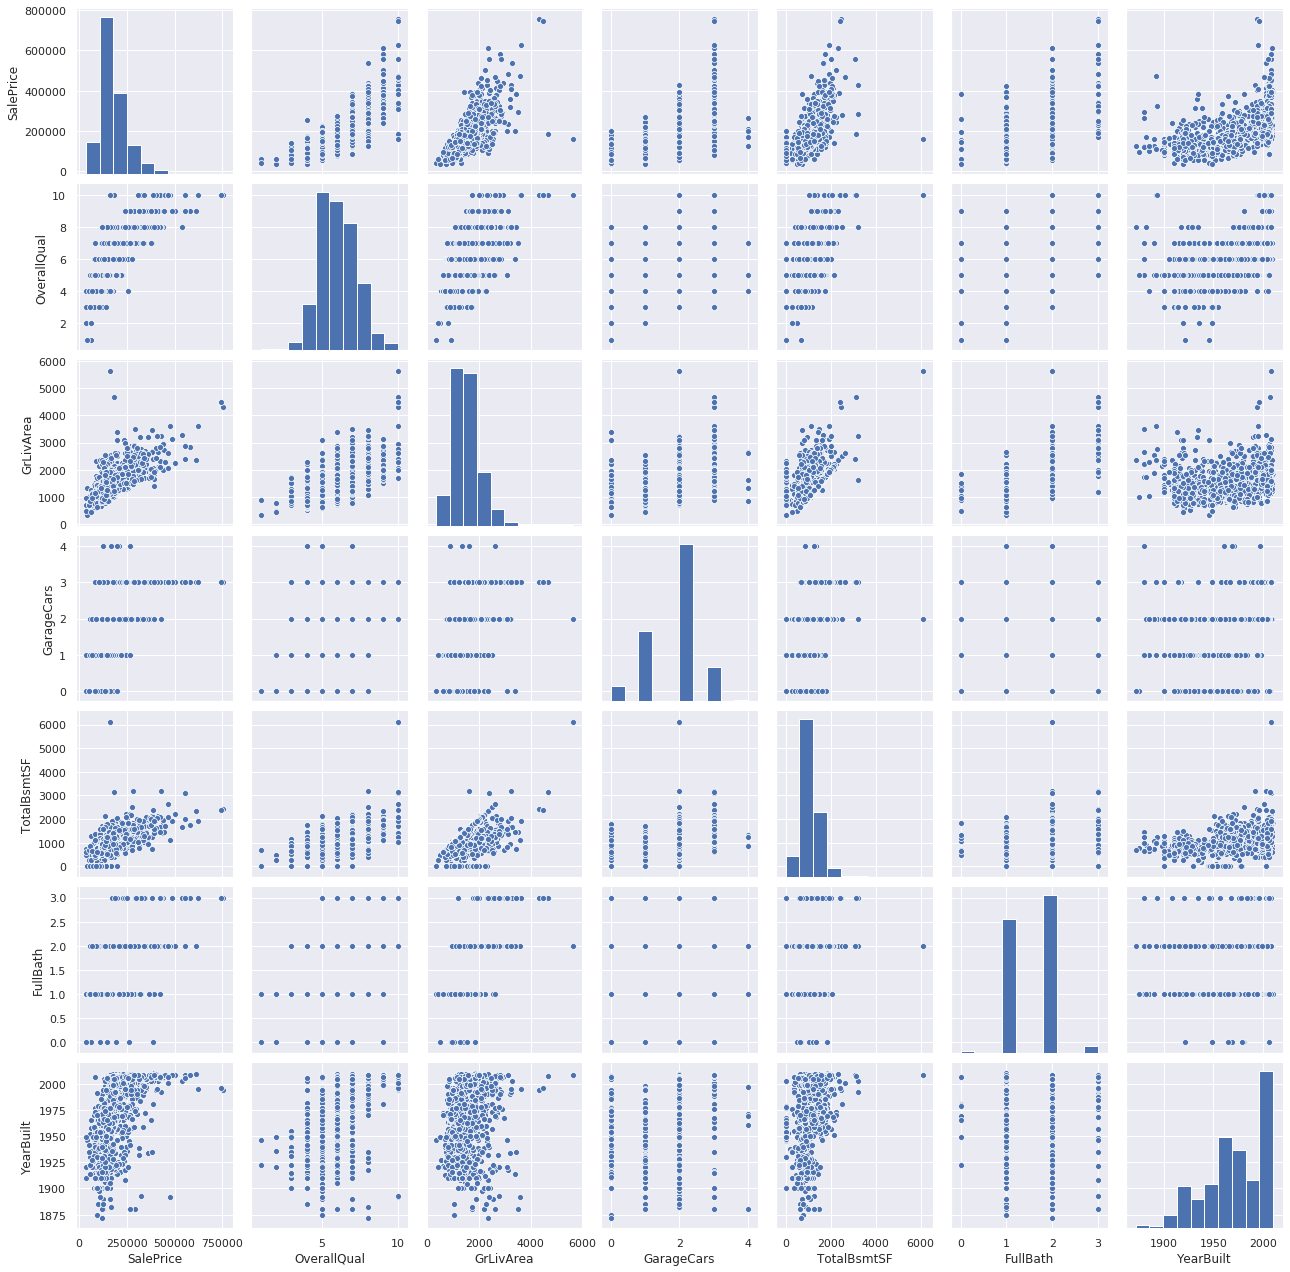

In [45]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols])
plt.show()